In [75]:
%pylab inline
import numpy as np
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [76]:
DATA_FOLDER = "data/"
MODEL_FOLDER = "models/part-adagrad/"
OUTPUT_FOLDER = "outputs/"
TRAIN_FILE_PATH = DATA_FOLDER + "train.csv"
TEST_FILE_PATH = DATA_FOLDER + "test_X.csv"

In [77]:
# read train data
train_data = pd.read_csv(TRAIN_FILE_PATH, header=0, encoding="big5")

In [78]:
# preprocess train data
train_data[train_data=="NR"] = 0

In [79]:
train_data

,日期,測站,測項,0,1,2,3,4,5,6,...,14,15,16,17,18,19,20,21,22,23
0,2014/1/1,豐原,AMB_TEMP,14,14,14,13,12,12,12,...,22,22,21,19,17,16,15,15,15,15
1,2014/1/1,豐原,CH4,1.8,1.8,1.8,1.8,1.8,1.8,1.8,...,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8
2,2014/1/1,豐原,CO,0.51,0.41,0.39,0.37,0.35,0.3,0.37,...,0.37,0.37,0.47,0.69,0.56,0.45,0.38,0.35,0.36,0.32
3,2014/1/1,豐原,NMHC,0.2,0.15,0.13,0.12,0.11,0.06,0.1,...,0.1,0.13,0.14,0.23,0.18,0.12,0.1,0.09,0.1,0.08
4,2014/1/1,豐原,NO,0.9,0.6,0.5,1.7,1.8,1.5,1.9,...,2.5,2.2,2.5,2.3,2.1,1.9,1.5,1.6,1.8,1.5
5,2014/1/1,豐原,NO2,16,9.2,8.2,6.9,6.8,3.8,6.9,...,11,11,22,28,19,12,8.1,7,6.9,6
6,2014/1/1,豐原,NOx,17,9.8,8.7,8.6,8.5,5.3,8.8,...,14,13,25,30,21,13,9.7,8.6,8.7,7.5
7,2014/1/1,豐原,O3,16,30,27,23,24,28,24,...,65,64,51,34,33,34,37,38,38,36
8,2014/1/1,豐原,PM10,56,50,48,35,25,12,4,...,52,51,66,85,85,63,46,36,42,42
9,2014/1/1,豐原,PM2.5,26,39,36,35,31,28,25,...,36,45,42,49,45,44,41,30,24,13


In [80]:
# concat 20 days data
train_array_months = []  # 12 numpy.array, array's shape is (18, 480)
for month in range(12):
    trainDataArr = np.concatenate( [train_data[(360*month+18*day):(360*month+18*(day+1))][list(range(3, 27))].apply(pd.to_numeric).as_matrix() for day in range(20)], axis=1)
    train_array_months.append(trainDataArr)

## Train

In [81]:
# use part of data
x_row_idxs = [0, 1, 2, 3, 4, 5, 6, 9, 12, 13, 16, 17]
x_row_num = len(x_row_idxs)
x_col_num = 9

train_array_months_part = [train_array_months[month][x_row_idxs, :] for month in range(12)]

In [82]:
w = np.random.randn(x_row_num, x_col_num)
b = np.random.randn()

In [83]:
# LOAD_MODEL_FOLDER = "models/all-momentum/"
# model_file = '6.95181970054.npz'
# model = np.load(LOAD_MODEL_FOLDER + model_file)
# w = model['w']
# b = model['b']
# w = w[x_row_idxs]

In [103]:
prev_loss = np.inf

In [85]:
# momentum
gamma = 0.9
vb = 0
vw = np.zeros((x_row_num, x_col_num))

In [86]:
# adadelta
b_grad_square_sum = 0
w_grad_square_sum = np.zeros((x_row_num, x_col_num))
gamma = 0.9
# eps = 10**(-8)

In [87]:
MODEL_FOLDER = "models/part-adadelta-reset/"

In [88]:
total_epoch = 0

In [101]:
lr = 5 * 10**(-4)

In [105]:

while True:
# for save_cycle in range(10):
    for epoch in range(1000):
        loss = 0
        b_grad = 0
        w_grad = np.zeros((x_row_num, x_col_num))
        for month in range(12):
            for hour in range(470):
                x = train_array_months_part[month][:, hour:hour+9]
                y_data = train_array_months[month][9, hour+9]

                y_pred= einsum('ij,ij', x, w) + b
                diff = y_data - y_pred
                loss += diff * diff

                mult = 2 * diff * (-1)
                b_grad += mult
                w_grad += mult * x  # 2 * diff * (-1) * x

        loss = sqrt(loss/(12*470))

        if loss > prev_loss:
            lr *= 0.8
        
        b_grad_square_sum = gamma * b_grad_square_sum + (1-gamma) * np.square(b_grad)
        w_grad_square_sum = gamma * w_grad_square_sum + (1-gamma) * np.square(w_grad)
        
#         vb = gamma * vb + lr * b_grad
#         vw = gamma * vw + lr * w_grad
        b = b - lr * (b_grad / np.sqrt(b_grad_square_sum))
        w = w - lr * (w_grad / np.sqrt(w_grad_square_sum))
        
        total_epoch += 1
        prev_loss = loss
        
    print(lr, loss)
    
    np.savez(MODEL_FOLDER + "epo" + str(total_epoch) + "_los" + str(loss)[:6], w=w, b=b, w_grad_square_sum=w_grad_square_sum, b_grad_square_sum=b_grad_square_sum)

print('end')

0.0005 5.95273404026
0.0005 5.94597405055
0.0005 5.93994912315
0.0005 5.93453652597
0.0005 5.92963978979
0.0005 5.92518200181
0.0005 5.92110110916
0.0005 5.91734653473
0.0005 5.91387668102
0.0005 5.9106570542
0.0005 5.90765883221
0.0005 5.90485775817
0.0005 5.90223327597
0.0005 5.89976784938
0.0005 5.89744642144
0.0005 5.8952559825
0.0005 5.89318522314
0.0005 5.89122425357
0.0005 5.88936437594
0.0005 5.88759789848
0.0005 5.88591798318
0.0005 5.88431852047
0.0005 5.88279402553
0.0005 5.88133955228
0.0005 5.87995062154
0.0005 5.87862316092
0.0005 5.87735345426
0.0005 5.87613809883
0.0005 5.87497396906
0.0005 5.87385818553
0.0005 5.87278808848
0.0005 5.87176121495
0.0005 5.87077527902
0.0005 5.86982815463
0.0005 5.86891786065
0.0005 5.86804254769
0.0005 5.86720048655
0.0005 5.86639005797
0.0005 5.86560974359
0.0005 5.8648581178
0.0005 5.86413384049
0.0005 5.86343565054
0.0005 5.86276235997
0.0005 5.86211284856
0.0005 5.86148605911
0.0005 5.86088099296
0.0005 5.86029670608
0.0005 5.8597323

KeyboardInterrupt: 

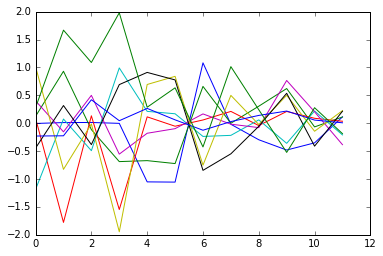

In [98]:
plot(w)

## Test

In [ ]:
test_data = pd.read_csv(TEST_FILE_PATH, header=None, encoding="big5")
# preprocess
test_data[test_data=="NR"] = 0
# to numpy array
test_array = test_data[:][list(range(2, 11))].apply(pd.to_numeric).as_matrix()
test_array.shape

In [ ]:
dataNum = 240

In [ ]:
predYs = []
for dataIdx in range(dataNum):
    rowIdx = dataIdx * 18
    x = test_array[rowIdx+9:rowIdx+10, :]
    y_pred= einsum('ij,ij', x, w) + b
    predYs.append(predY)
predYs

In [ ]:
predYSeries = pd.Series(predYs)
predYSeries

In [ ]:
_id = pd.Series(["id_" + str(i) for i in range(dataNum)])
# _id = test_data.ix[test_data[1] == "PM2.5", 0]
output = pd.concat([_id, predYSeries], axis=1)
output.columns=["id","value"]
output

In [ ]:
output.ix[output["value"]<0,["value"]]=0
output

In [ ]:
output.to_csv(OUTPUT_FOLDER + "output_linear_only-pm2.5.csv", index=False)